### Read the dataset

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
# Min/max length of words
min(len(word) for word in words), max(len(word) for word in words)

(2, 15)

### Create a bigramm dictionary

In [5]:
b = {}
start_end_char = '.'

for word in words:
    chs = [start_end_char] + list(word) + [start_end_char]
    for w1, w2 in zip(chs, chs[1:]):
        bigram = (w1, w2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(w1, w2)

In [6]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [7]:
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [8]:
stoi = {s:i+1 for i, s in enumerate(chars)}

# Add a start and end token
stoi[start_end_char] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [9]:
itos = {k:s for s, k in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [10]:
import torch

# Dim of the matrix is the number of unique characters
dim = len(stoi)

# Initialize the matrix with zeros
N = torch.zeros((dim, dim), dtype=torch.int32)

# Fill the matrix with the counts of the bigrams
for word in words:
    chs = [start_end_char] + list(word) + [start_end_char]
    for w1, w2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[w1], stoi[w2]
        N[ix1, ix2] += 1
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 26.5, 26.5, -0.5)

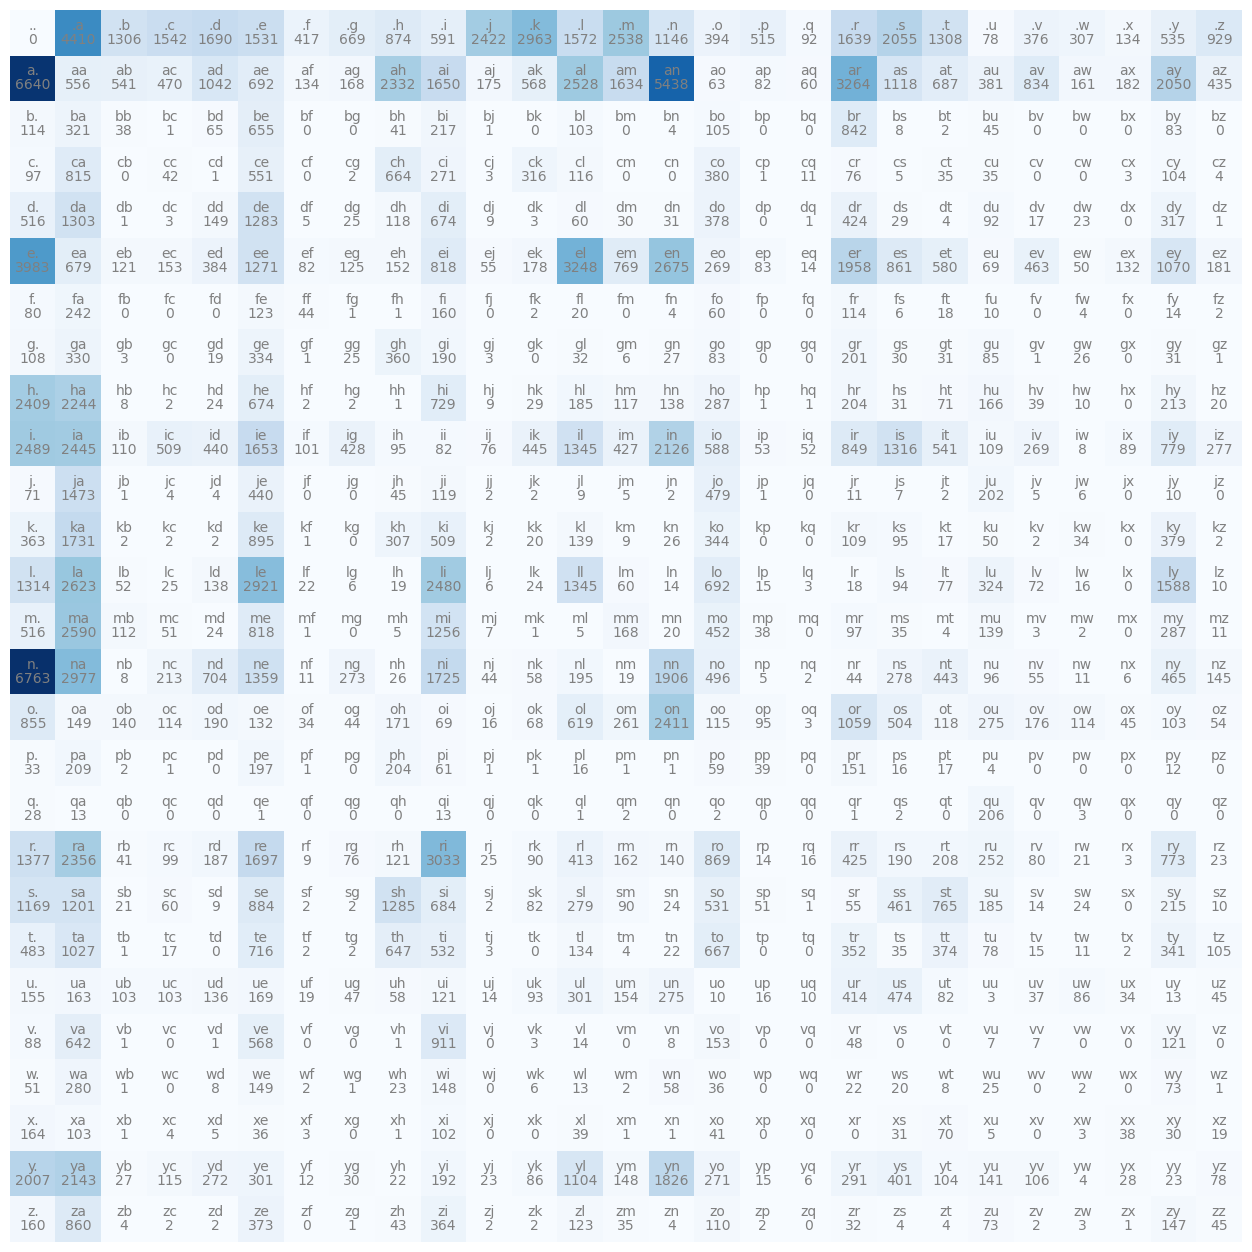

In [12]:
# Plot the matrix with the counts of the bigrams and the characters
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")

for i in range(dim):
    for j in range(dim):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='grey')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='grey')

plt.axis('off')

In [13]:
# Row 0
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [14]:
# Probability of the bigrams in the first row
p = N[0].float() / N[0].sum()

print(f"{p=}")
# Check if the sum of the probabilities is 1
print(f"Check if the sum of the probabilities is 1: {p.sum()=}")

p=tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
Check if the sum of the probabilities is 1: p.sum()=tensor(1.)


In [15]:
# Generator for the random numbers for the stable results
g = torch.Generator().manual_seed(2147483647)

# Test distribution for the multinomial
test_dist = torch.tensor([0.66, 0.30, 0.03], dtype=torch.float32)

# Generate 100 samples from the multinomial distribution
# There are must to be approximatelly
# 66 samples of the first element, 30 of the second and 3 of the third
torch.multinomial(test_dist, num_samples=100, replacement=True, generator=g)


tensor([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1])

In [16]:
# Or let's create a rand distribution
p = torch.rand(3, generator=g)

p = p / p.sum()

# And sample from it
s = torch.multinomial(p, num_samples=20, replacement=True, generator=g)

p, s

(tensor([0.3523, 0.1710, 0.4767]),
 tensor([2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1]))

In [17]:
# Generator for the random numbers for the stable results
g = torch.Generator().manual_seed(2147483647)

# Sample a character from the first row of the probability row vector
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'.'

In [18]:
# +1 for smoothing results, if we leave 0 here the result of division will be inf, not good
P = (N + 1).float()

# Normalize and keepdim=True to keep the 2D shape
P /= P.sum(dim=1, keepdim=True)
P.round(decimals=2)

tensor([[0.0000, 0.1400, 0.0400, 0.0500, 0.0500, 0.0500, 0.0100, 0.0200, 0.0300,
         0.0200, 0.0800, 0.0900, 0.0500, 0.0800, 0.0400, 0.0100, 0.0200, 0.0000,
         0.0500, 0.0600, 0.0400, 0.0000, 0.0100, 0.0100, 0.0000, 0.0200, 0.0300],
        [0.2000, 0.0200, 0.0200, 0.0100, 0.0300, 0.0200, 0.0000, 0.0000, 0.0700,
         0.0500, 0.0100, 0.0200, 0.0700, 0.0500, 0.1600, 0.0000, 0.0000, 0.0000,
         0.1000, 0.0300, 0.0200, 0.0100, 0.0200, 0.0000, 0.0100, 0.0600, 0.0100],
        [0.0400, 0.1200, 0.0100, 0.0000, 0.0200, 0.2500, 0.0000, 0.0000, 0.0200,
         0.0800, 0.0000, 0.0000, 0.0400, 0.0000, 0.0000, 0.0400, 0.0000, 0.0000,
         0.3200, 0.0000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0000, 0.0300, 0.0000],
        [0.0300, 0.2300, 0.0000, 0.0100, 0.0000, 0.1600, 0.0000, 0.0000, 0.1900,
         0.0800, 0.0000, 0.0900, 0.0300, 0.0000, 0.0000, 0.1100, 0.0000, 0.0000,
         0.0200, 0.0000, 0.0100, 0.0100, 0.0000, 0.0000, 0.0000, 0.0300, 0.0000],
        [0.0900, 0.2400,

In [19]:
# Check if the sum of the probabilities is 1
P[0].sum()

tensor(1.)

In [20]:
# Bug example
P2 = N.float()

# Normalize, but keepdim is missing
P2_sum = P2.sum(dim=1)
P2 = P2 / P2_sum

# Broadcasting will align the shapes by the rightmost dimensions
# P2.shape     = (27, 27) => (27, 27)
# P2_sum.shape = (27,)    => (1, 27)
# Then copy the P2_sum to make it the same shape as P2
# P2_sum.shape = (1, 27) => (27, 27)

# And the broadcast did it wrong, because we lost the shape!
P2_sum.shape, P2[0].sum()

(torch.Size([27]), tensor(7.0225))

In [21]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(5):
    ix, out = 0, []
    while True:
        p = P[ix]

        # NOTE: Instead we can use the multinomial directly
        # p = N[ix].float()
        # p = p / p.sum()
        # p = torch.ones(dim) / float(dim)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        ch = itos[ix]

        out.append(ch)

        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


(-0.5, 26.5, 26.5, -0.5)

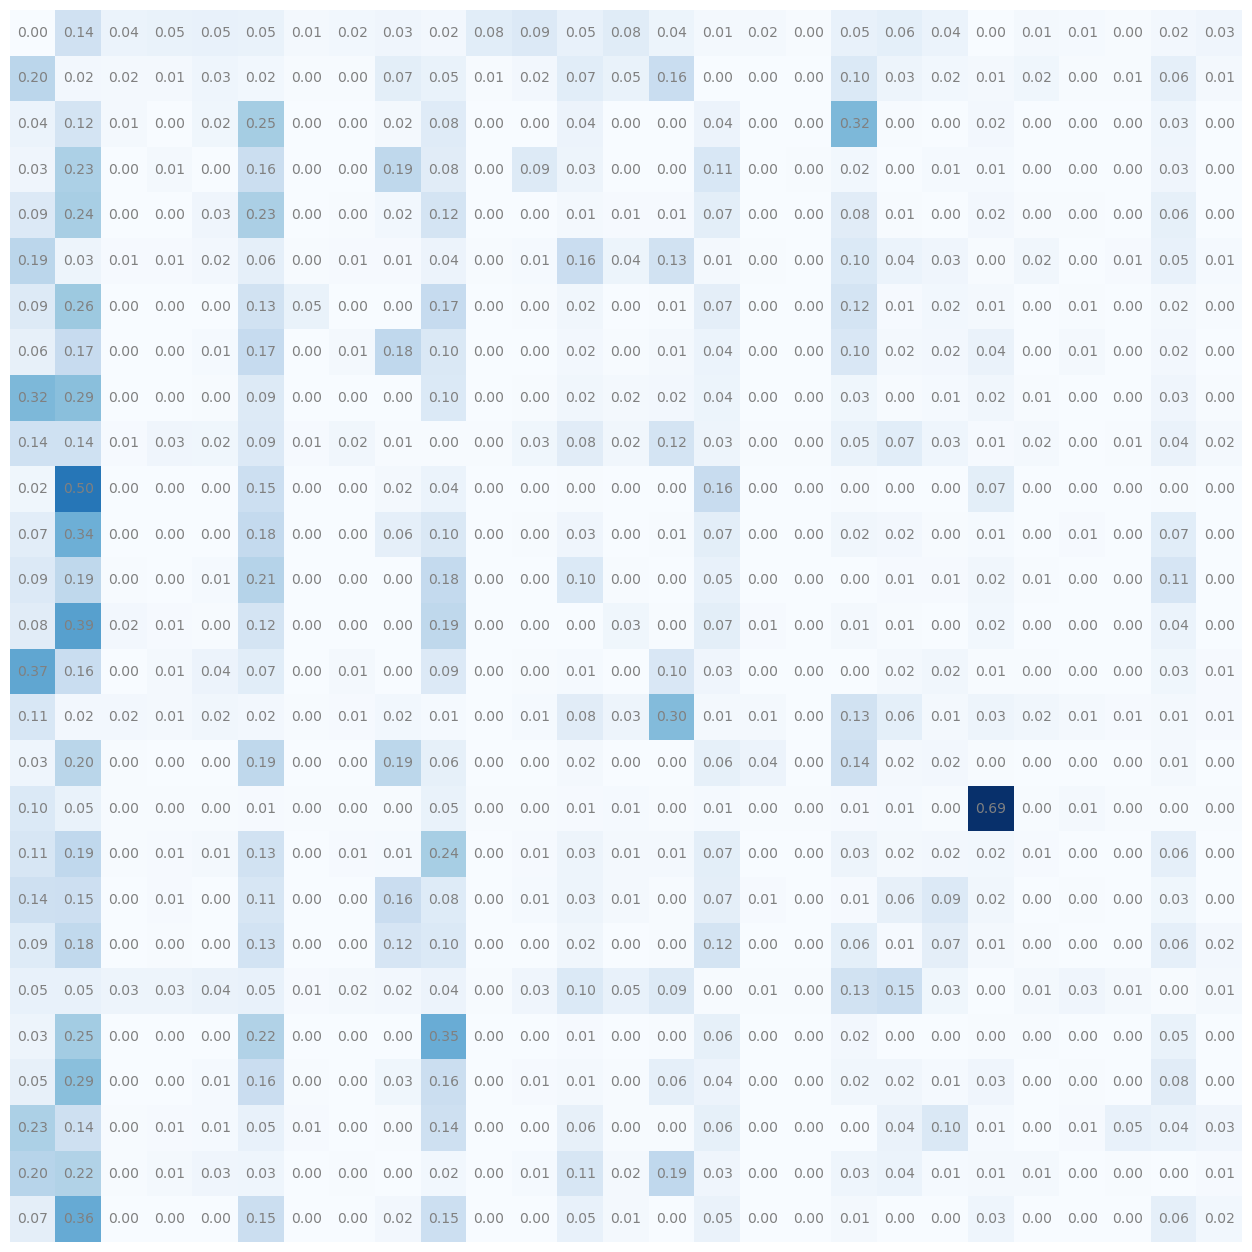

In [22]:
# Plot the matrix N with the probabilities
plt.figure(figsize=(16, 16))
plt.imshow(P, cmap="Blues")

for i in range(dim):
    for j in range(dim):
        chstr = itos[i] + itos[j]
        plt.text(j, i, f"{P[i,j].item():.2f}", ha='center', va='center', color='grey')

plt.axis('off')

### Instead of probs we'll use the log probs

log probabilities means representing probabilities on a logarithmic scale $(−\inf , 0]$, instead of the standard $[0 , 1]$ unit interval.

In [23]:
n, log_likelihood = 0, 0.0

# for word in words:
for word in ["nnikjgkitra"]:
    chs = [start_end_char] + list(word) + [start_end_char]
    for w1, w2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[w1], stoi[w2]
        probs = P[ix1, ix2]
        logprob = torch.log(probs)
        log_likelihood += logprob
        n += 1
        print(f"{w1}{w2} => Probs: {probs:.4f}; Logprob: {logprob:.4f}")

print("=========================")
print("Summary: ")

print(f"Log likelihood: {log_likelihood=}")

# Negative log likelihood
nll = -log_likelihood

print(f"Negative log likelihood: {nll=}")

# Normalize the negative log likelihood
print(f"Normalized negative log likelihood: {nll/n=}")


.n => Probs: 0.0358; Logprob: -3.3305
nn => Probs: 0.1039; Logprob: -2.2643
ni => Probs: 0.0940; Logprob: -2.3640
ik => Probs: 0.0252; Logprob: -3.6826
kj => Probs: 0.0006; Logprob: -7.4319
jg => Probs: 0.0003; Logprob: -7.9817
gk => Probs: 0.0005; Logprob: -7.5776
ki => Probs: 0.1007; Logprob: -2.2961
it => Probs: 0.0306; Logprob: -3.4876
tr => Probs: 0.0631; Logprob: -2.7635
ra => Probs: 0.1852; Logprob: -1.6863
a. => Probs: 0.1958; Logprob: -1.6305
Summary: 
Log likelihood: log_likelihood=tensor(-46.4967)
Negative log likelihood: nll=tensor(46.4967)
Normalized negative log likelihood: nll/n=tensor(3.8747)


In [24]:
# Create a training set of bigrams
xs, ys = [], []
for word in words[:1]:
    chs = [start_end_char] + list(word) + [start_end_char]
    for w1, w2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[w1], stoi[w2]
        print(f"{w1} {w2}")
        xs.append(ix1)
        ys.append(ix2)

xs, ys = torch.tensor(xs), torch.tensor(ys)
xs, ys

. e
e m
m m
m a
a .


(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [25]:
import torch.nn.functional as F

# One-hot encode the input tensor
xenc = F.one_hot(xs, num_classes=dim).float()
xenc, xenc.shape, xenc.dtype

(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 torch.Size([5, 27]),
 torch.float32)

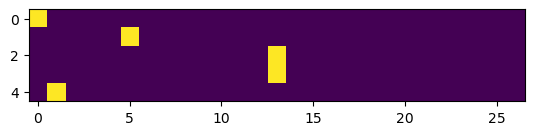

In [26]:
# Visual representation of the one-hot encoded tensor, encode classes to ones in the place of the value
plt.imshow(xenc)

In [27]:
# Init the weights matrix
W = torch.randn((dim, 1))

# DIMS: (5, 27) @ (27, 1) = (5, 1)
res = xenc @ W
res, res.shape

(tensor([[ 0.8317],
         [-0.8021],
         [-0.9440],
         [-0.9440],
         [ 0.0553]]),
 torch.Size([5, 1]))

In [28]:
# init the full-dim weight matrix
W = torch.randn((dim, dim))

# Shape is (5, 27) @ (27, 27) = (5, 27)
res = xenc @ W
res.round(decimals=2), res.shape

(tensor([[ 0.4800, -0.7000,  0.0900, -0.1000,  0.3200,  0.2400,  0.2400, -2.1800,
          -0.6800, -0.7400, -0.4600,  0.6800, -0.4500, -0.6700,  0.9400, -0.6000,
           0.4600, -1.7400, -0.5100,  0.1700, -0.9900,  0.4900,  0.9800,  0.2400,
          -0.5300, -0.2900,  1.6600],
         [ 1.1300,  1.0300, -1.0000, -0.8800,  0.1800, -1.4400, -0.4500,  0.5900,
          -1.8100, -1.8100,  1.4100, -0.9200,  0.0600,  1.1800,  0.5200,  0.1400,
          -0.3400, -0.7700, -1.0400, -0.1900, -1.3600,  0.2400,  0.0800, -1.0000,
           0.7100,  1.0700,  1.1200],
         [ 0.6600, -1.3000,  0.3700, -0.2600, -0.5900, -0.5100, -0.0600,  0.7500,
           0.2700,  1.3700, -0.6000, -0.0500, -0.4700,  0.5200,  0.0100,  1.4500,
           1.1300, -1.5100, -0.4000, -0.3300,  0.6700,  0.3000, -0.3200, -0.6300,
           0.1800,  1.0500,  0.5600],
         [ 0.6600, -1.3000,  0.3700, -0.2600, -0.5900, -0.5100, -0.0600,  0.7500,
           0.2700,  1.3700, -0.6000, -0.0500, -0.4700,  0.5200,  0

In [29]:
logits = xenc @ W # log-counts

counts = logits.exp() # Equivalent to N, because exp(log(N)) = N

# Normalize and get probabilities
probs = counts / counts.sum(dim=1, keepdim=True)
probs

tensor([[0.0506, 0.0154, 0.0340, 0.0283, 0.0429, 0.0397, 0.0396, 0.0035, 0.0158,
         0.0149, 0.0196, 0.0616, 0.0199, 0.0160, 0.0794, 0.0170, 0.0493, 0.0054,
         0.0187, 0.0369, 0.0116, 0.0508, 0.0834, 0.0396, 0.0183, 0.0234, 0.1643],
        [0.0862, 0.0778, 0.0103, 0.0116, 0.0334, 0.0066, 0.0177, 0.0502, 0.0046,
         0.0046, 0.1145, 0.0111, 0.0297, 0.0906, 0.0470, 0.0321, 0.0198, 0.0129,
         0.0098, 0.0230, 0.0072, 0.0353, 0.0303, 0.0102, 0.0569, 0.0814, 0.0851],
        [0.0510, 0.0071, 0.0379, 0.0202, 0.0146, 0.0158, 0.0247, 0.0558, 0.0343,
         0.1038, 0.0145, 0.0250, 0.0165, 0.0442, 0.0266, 0.1120, 0.0813, 0.0058,
         0.0177, 0.0189, 0.0514, 0.0353, 0.0191, 0.0140, 0.0314, 0.0749, 0.0461],
        [0.0510, 0.0071, 0.0379, 0.0202, 0.0146, 0.0158, 0.0247, 0.0558, 0.0343,
         0.1038, 0.0145, 0.0250, 0.0165, 0.0442, 0.0266, 0.1120, 0.0813, 0.0058,
         0.0177, 0.0189, 0.0514, 0.0353, 0.0191, 0.0140, 0.0314, 0.0749, 0.0461],
        [0.0303, 0.0293,

In [30]:
probs.shape, probs[0].sum()

(torch.Size([5, 27]), tensor(1.0000))

In [31]:
# Summary
# Input and output data
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [33]:
# Idxs from 0 to 4 and values of ys accordingly
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0397),
 tensor(0.0906),
 tensor(0.0442),
 tensor(0.0071),
 tensor(0.0303))

In [34]:
# We can replace the above with the following
probs[torch.arange(probs.shape[0]), ys]

tensor([0.0397, 0.0906, 0.0442, 0.0071, 0.0303])

In [35]:
# Avg log likelihood for the probabilities
loss = -probs[torch.arange(probs.shape[0]), ys].log().mean()
loss

tensor(3.4374)

In [110]:
# randomly initialize 27 neurons weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((dim, dim), generator=g, requires_grad=True)

In [121]:
# Forward pass
# One-hot encoding as the input of the model
xenc = F.one_hot(xs, num_classes=dim).float()

# Predict the log-counts
logits = xenc @ W

################################
########### Softmax ############
################################

# Convert log-counts to counts
counts = logits.exp()
# Normalize counts to get probabilities
probs = counts / counts.sum(dim=1, keepdim=True)
loss = -probs[torch.arange(probs.shape[0]), ys].log().mean()

probs.shape, loss

(torch.Size([5, 27]), tensor(3.7292, grad_fn=<NegBackward0>))

In [116]:
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [118]:
# Backward pass
W.grad = None # Set to zero
loss.backward()

In [120]:
W.data += -0.1 * W.grad


In [36]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigrams
    x = xs[i].item()
    y = ys[i].item()
    print("--------------------------------------")
    print(f"Bigram example: {itos[x]}{itos[y]}, indexes: {x}, {y}")
    print(f"Input to the neural network: {x}")
    print(f"Output probabilities: {probs[i]}")
    print(f"Label (actual next character): {y}")
    p = probs[i, y]
    print(f"Probability assigned to the actual next character: {p:.4f}")
    logprob = torch.log(p)
    print(f"Log likelihood: {logprob:.4f}")
    nll = -logprob
    print(f"Negative log likelihood: {nll:.4f}")
    nlls[i] = nll

print("=====================================")
print(f"Average negative log likelihood / LOSS: {nlls.mean():.4f}")

--------------------------------------
Bigram example: .e, indexes: 0, 5
Input to the neural network: 0
Output probabilities: tensor([0.0506, 0.0154, 0.0340, 0.0283, 0.0429, 0.0397, 0.0396, 0.0035, 0.0158,
        0.0149, 0.0196, 0.0616, 0.0199, 0.0160, 0.0794, 0.0170, 0.0493, 0.0054,
        0.0187, 0.0369, 0.0116, 0.0508, 0.0834, 0.0396, 0.0183, 0.0234, 0.1643])
Label (actual next character): 5
Probability assigned to the actual next character: 0.0397
Log likelihood: -3.2266
Negative log likelihood: 3.2266
--------------------------------------
Bigram example: em, indexes: 5, 13
Input to the neural network: 5
Output probabilities: tensor([0.0862, 0.0778, 0.0103, 0.0116, 0.0334, 0.0066, 0.0177, 0.0502, 0.0046,
        0.0046, 0.1145, 0.0111, 0.0297, 0.0906, 0.0470, 0.0321, 0.0198, 0.0129,
        0.0098, 0.0230, 0.0072, 0.0353, 0.0303, 0.0102, 0.0569, 0.0814, 0.0851])
Label (actual next character): 13
Probability assigned to the actual next character: 0.0906
Log likelihood: -2.4017
Ne

### All in ones

In [37]:
# Create a training set of bigrams
xs, ys = [], []
for word in words:
    chs = [start_end_char] + list(word) + [start_end_char]
    for w1, w2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[w1], stoi[w2]
        xs.append(ix1)
        ys.append(ix2)

xs, ys = torch.tensor(xs), torch.tensor(ys)
num = xs.nelement()

print(f"Number of examples: {num=}")

# Init the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((dim, dim), generator=g, requires_grad=True)

Number of examples: num=228146


In [38]:
# Gradient descent
for _ in range(100):
    # Forward pass
    xenc = F.one_hot(xs, num_classes=dim).float()

    # Predict the log-counts
    logits = xenc @ W

    ################################
    ########### Softmax ############
    ################################

    # Convert log-counts to counts
    counts = logits.exp()
    # Normalize counts to get probabilities
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -probs[torch.arange(probs.shape[0]), ys].log().mean()
    print(f"Loss: {loss.item()}")

    # Backward pass
    W.grad = None # Set to zero
    loss.backward()

    # Update the weights
    W.data += -50 * W.grad
    

Loss: 3.758953809738159
Loss: 3.371100902557373
Loss: 3.154043197631836
Loss: 3.020373821258545
Loss: 2.927711248397827
Loss: 2.8604023456573486
Loss: 2.8097293376922607
Loss: 2.7701022624969482
Loss: 2.7380728721618652
Loss: 2.711496353149414
Loss: 2.6890029907226562
Loss: 2.6696884632110596
Loss: 2.6529300212860107
Loss: 2.638277769088745
Loss: 2.6253879070281982
Loss: 2.6139907836914062
Loss: 2.60386323928833
Loss: 2.5948216915130615
Loss: 2.5867116451263428
Loss: 2.579403877258301
Loss: 2.572789192199707
Loss: 2.5667762756347656
Loss: 2.5612878799438477
Loss: 2.5562589168548584
Loss: 2.551633596420288
Loss: 2.547366142272949
Loss: 2.543415069580078
Loss: 2.539748430252075
Loss: 2.5363364219665527
Loss: 2.5331544876098633
Loss: 2.5301806926727295
Loss: 2.5273969173431396
Loss: 2.5247862339019775
Loss: 2.522334575653076
Loss: 2.520029067993164
Loss: 2.517857789993286
Loss: 2.515810966491699
Loss: 2.513878107070923
Loss: 2.512052059173584
Loss: 2.510324001312256
Loss: 2.50868678092956

In [39]:
W.exp().int()

tensor([[ 0,  8,  2,  2,  3,  2,  0,  1,  1,  1,  4,  5,  2,  4,  2,  0,  0,  0,
          3,  3,  2,  0,  0,  0,  0,  1,  1],
        [ 9,  0,  0,  0,  1,  0,  0,  0,  3,  2,  0,  0,  3,  2,  7,  0,  0,  0,
          4,  1,  0,  0,  1,  0,  0,  2,  0],
        [ 2,  7,  0,  0,  0, 17,  0,  0,  0,  4,  0,  0,  2,  0,  0,  2,  0,  0,
         22,  0,  0,  1,  0,  0,  0,  1,  0],
        [ 1, 10,  0,  0,  0,  7,  0,  0,  8,  3,  0,  3,  0,  0,  0,  4,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 4, 12,  0,  0,  1, 12,  0,  0,  0,  6,  0,  0,  0,  0,  0,  3,  0,  0,
          3,  0,  0,  0,  0,  0,  0,  2,  0],
        [15,  2,  0,  0,  1,  5,  0,  0,  0,  3,  0,  0, 12,  3, 10,  1,  0,  0,
          7,  3,  2,  0,  1,  0,  0,  4,  0],
        [ 5, 16,  2,  0,  1,  6,  1,  0,  1, 10,  1,  0,  0,  0,  0,  2,  2,  0,
          7,  0,  0,  1,  0,  0,  1,  1,  1],
        [ 1,  7,  0,  0,  1,  8,  0,  0,  8,  4,  0,  0,  1,  0,  0,  0,  0,  0,
          4,  0,  0,  1,  0,  

In [40]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(5):
    ix, out = 0, []
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=dim).float()
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum()

        ix = torch.multinomial(probs[0], num_samples=1, replacement=True, generator=g).item()

        ch = itos[ix]

        out.append(ch)

        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cfay.
a.
